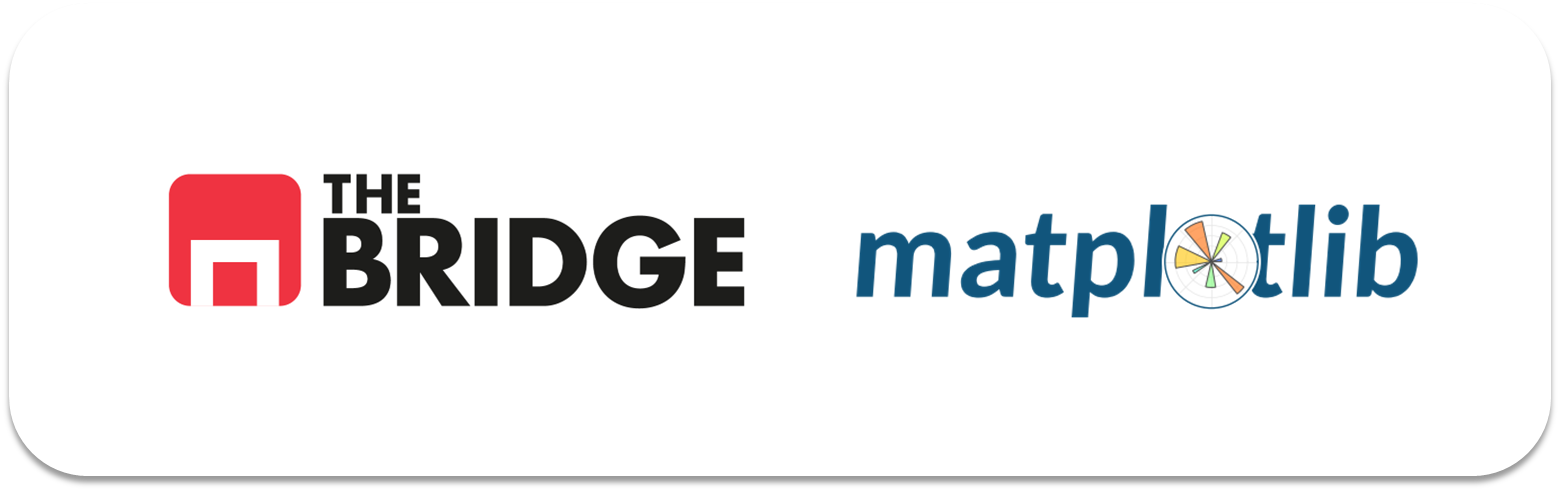

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # incorporamos a nuestra mesa de trabajo las herramientas que vamos a utilizar

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df_california = pd.read_csv("./data/california_cities.csv")
df_california.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [3]:
# Una vez cargado el contenido, procedemos a eliminar la columna Unnamed: 0 porque no tiene valor. También podemos ver filas que contienen nulos (NaN)
df_california = df_california.drop(columns=["Unnamed: 0"])


In [4]:
df_california.isnull().sum() # Comprobamos cuantos nulos podemos ver en nuestro dataset

city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [5]:
# También eliminamos las filas con nulos.
df_california = df_california.dropna()  # Utilizamos dropna para eliminar las filas que contengan algún nulo.
df_california.isnull().sum() # Comrprobación después de borrado si es cierto qye ha eliminado los nulos que nos aparecían antes.


city                  0
latd                  0
longd                 0
elevation_m           0
elevation_ft          0
population_total      0
area_total_sq_mi      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        0
area_land_km2         0
area_water_km2        0
area_water_percent    0
dtype: int64

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

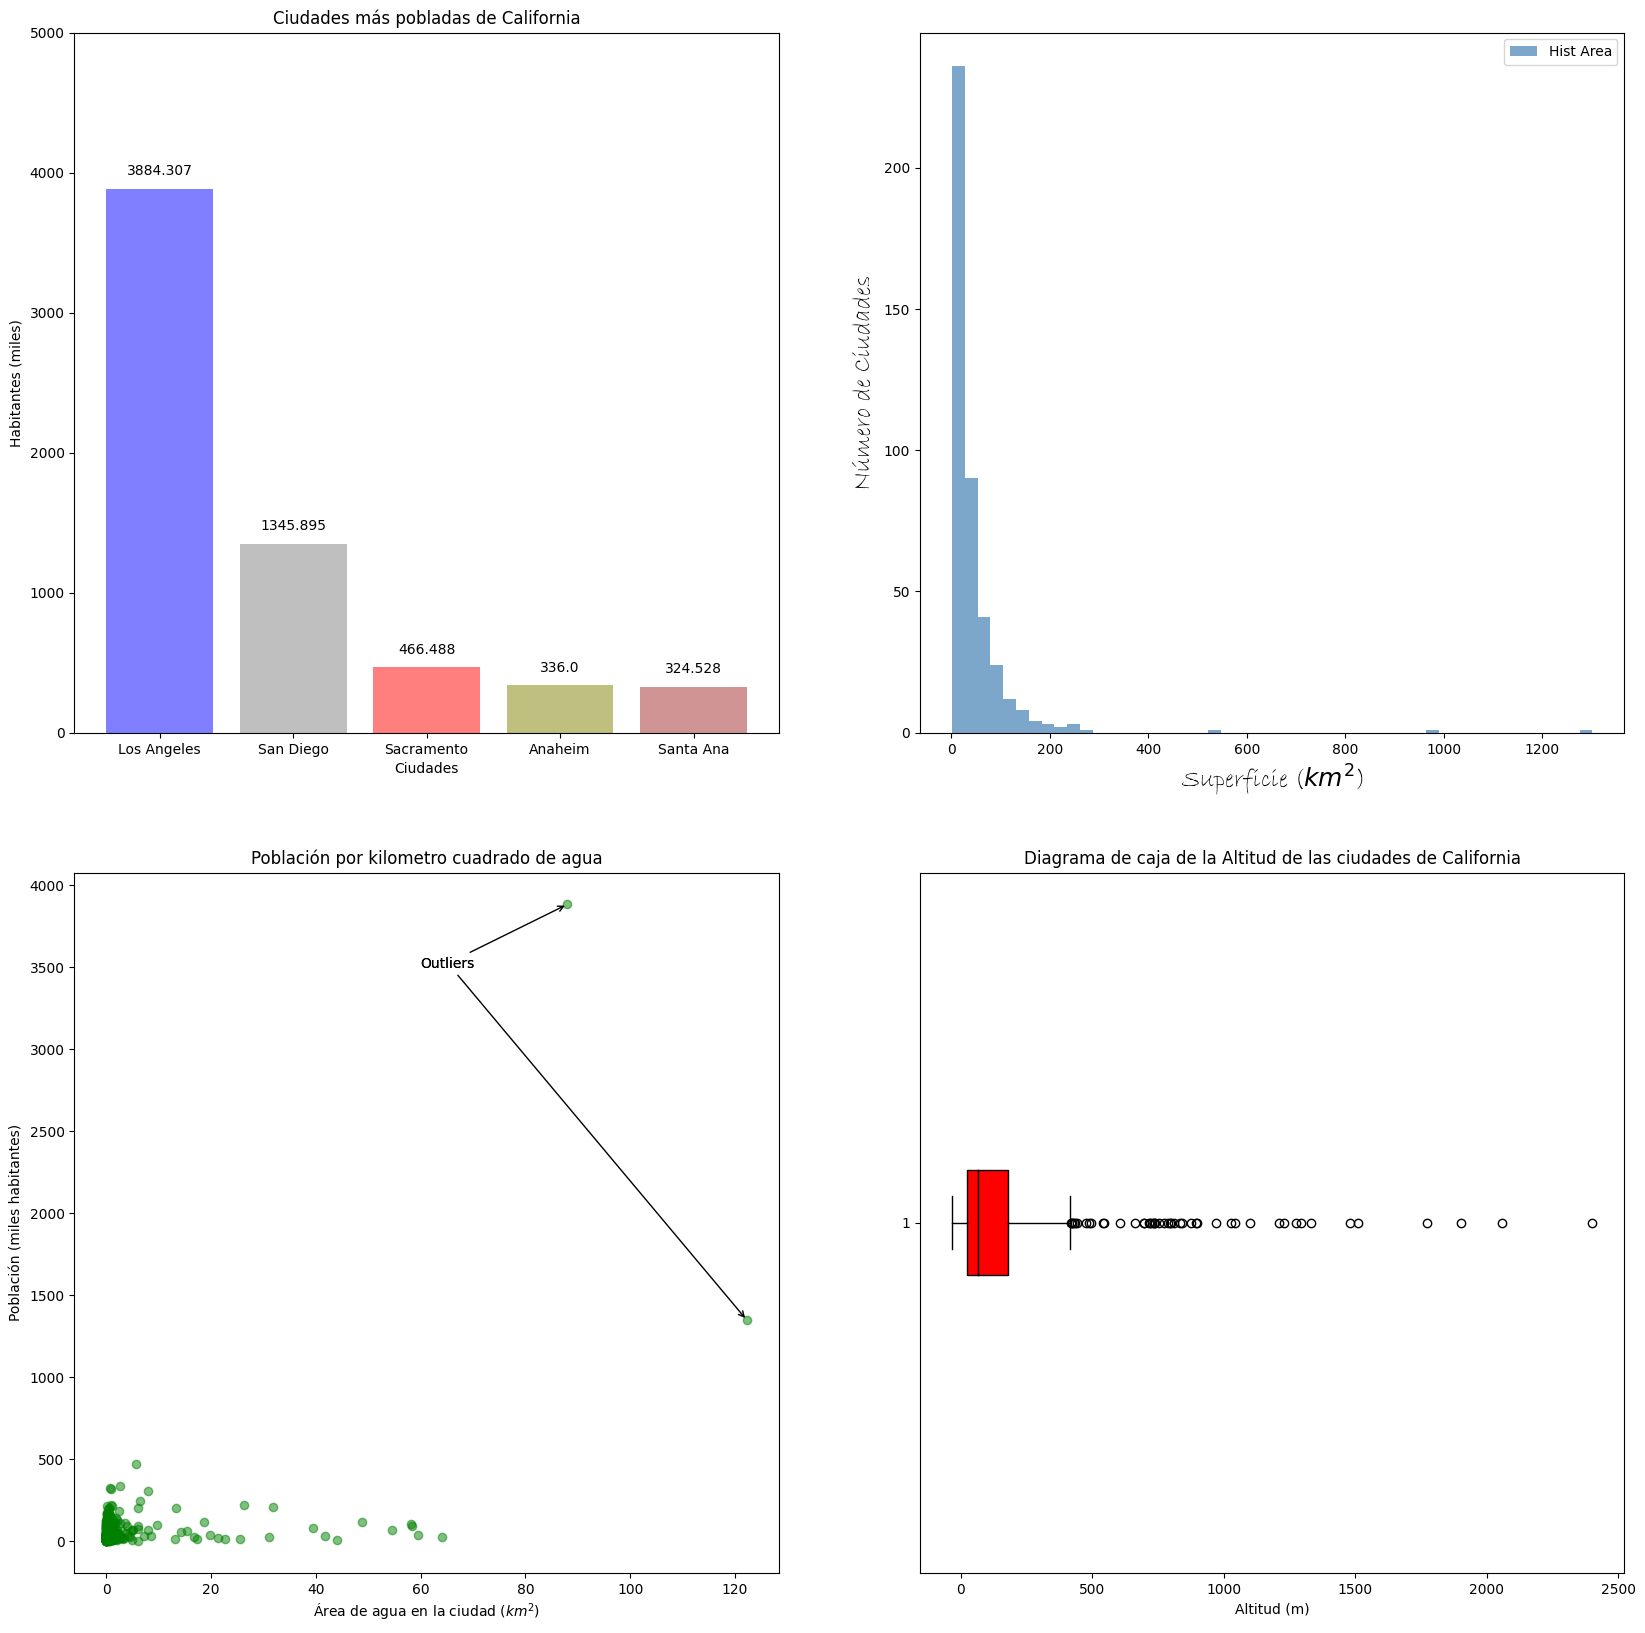

In [6]:
df_california.head() # Lo hacemos para tener los datos a mano y evitar subir y bajar la pantalla cada vez que queremos consultar nuestros datos.

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


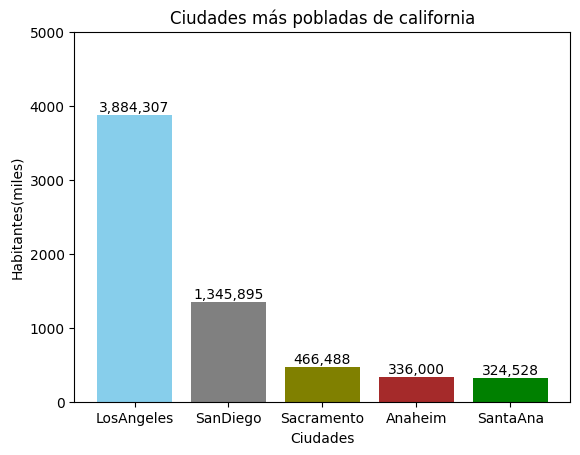

In [7]:
# 1º GRÁFICO -> GRÁFICO DE BARRAS 

# DATOS DEL GRÁFICO
poblacion_ciudades = df_california.groupby("city")["population_total"].sum().sort_values(ascending=False).reset_index() # ordenamos el dataframe por ciudad teniendo en cuenta la suma de su población. En sort_value utilizamos "ascending = False" para ordenar de mayor a menos los datos
top_ciudades_mayor_poblacion = poblacion_ciudades.head(5)
top_ciudades_mayor_poblacion


# DIBUJO

colores = ['skyblue', 'gray', 'olive', 'brown', "green"]
plt.bar(top_ciudades_mayor_poblacion["city"], height=top_ciudades_mayor_poblacion["population_total"]/1000, color = colores)
plt.title("Ciudades más pobladas de california")
plt.ylim(0,5000) # establecemos el límite del gráfico con el eje y
plt.ylabel("Habitantes(miles)")
plt.xlabel("Ciudades")

for i, row in top_ciudades_mayor_poblacion.iterrows(): # i representa el indice de la fila mientras que row representa la fila completa con todos sus datos . En este caso , row representa tanto la ciudad como su población.
    ciudad = row["city"] # Accedemos a los valores de la columna city
    poblacion_miles = row["population_total"] / 1000 # Accedemos a los valores de la columna population_total y los dividimos entre 1000
    plt.text(ciudad, poblacion_miles + 50, f"{int(row['population_total']):,}", ha="center") # Pintamos por cada ciudad, el numero de población encima del limite de la barra 50 puntos, el numero de habitantes

plt.show() # mostramos el gráfico


In [8]:
df_california.head(2)

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37


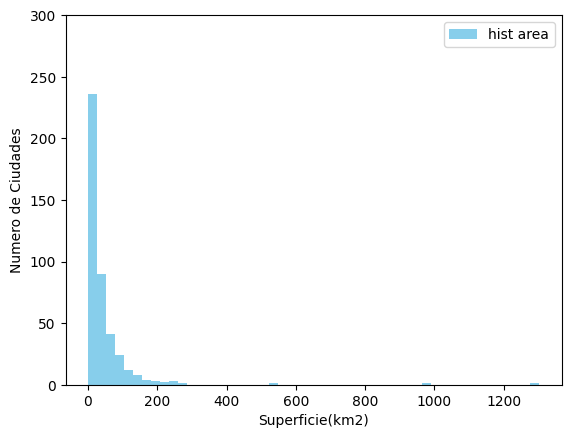

In [9]:
# 2º GRÁFICO -> HISTOGRAMA

# DATOS 
area_total_ciudades = df_california.groupby("city")["area_total_km2"].sum().sort_values(ascending=False).reset_index()
area_total_ciudades # Tenemos el área total en km2 de lo que ocupa cada ciudad.

# DIBUJO

plt.hist(area_total_ciudades["area_total_km2"], bins = 50 , color='skyblue', label= "hist area") # label lo utilizamos para poder mostrar la leyenda con ptl.legend
plt.ylim(0,300)
plt.legend()
plt.xlabel("Superficie(km2)")
plt.ylabel("Numero de Ciudades");

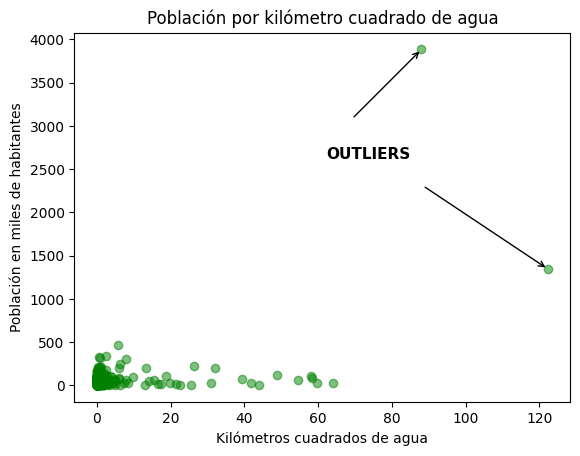

In [ ]:
# 3º GRÁFICO -> DIPERSIÓN

# DATOS
area_de_agua_numero_habitantes = df_california.groupby("population_total")["area_water_km2"].sum().sort_values(ascending = False).reset_index()
area_de_agua_numero_habitantes # obtenemos la superficie total de agua por cada población , o lo que es igual , por cada ciudad.

# DIBUJO BASE

plt.scatter(area_de_agua_numero_habitantes["area_water_km2"],
            area_de_agua_numero_habitantes["population_total"]/1000,
            color = "green",
            alpha = 0.5);

plt.title("Población por kilómetro cuadrado de agua")
plt.xlabel("Kilómetros cuadrados de agua")
plt.ylabel("Población en miles de habitantes");

# ANOTACIONES DE OUTLIERS

# Primero debemos de localizar las coordenadas de los outliers. Claramente hay dos.
x1 = area_de_agua_numero_habitantes["area_water_km2"][0] # Localizamos el outlier que tiene más área de km2 de agua
y1 = area_de_agua_numero_habitantes["population_total"][0]/1000 # Localizamos el punto y del primer outliers # los datos base están en formato original pero para que se adapte a nuestro eje y , tenemos que diidir entre 1000

x2 = area_de_agua_numero_habitantes["area_water_km2"][1] # Localizamos el outliers que está en segundo lugar en cuanto a km2 de agua.
y2 = area_de_agua_numero_habitantes["population_total"][1]/1000 # Localizamos el punto y del segundo outliers

# Los indices coindicen debido a que los datos de "area_de_agua_numero_habitantes" están ordenados de mayor a menos según "area_water_km2". De ahí que population_total[1] sea mayor que population_total[0].


# PINTAMOS EL TEXTO "OUTLIERS" en la posición determinada donde vamos a dirigir posteriormente las flechas.

x_text = x1 -60  # posición del texto en X UBICACIÓN TEXTO
y_text = (y1 + y2) / 2 # promedio y ajustado a miles  UBICACIÓN TEXTO
plt.text(x_text, y_text, 'OUTLIERS', fontsize=11, fontweight='bold') # la función plt.annotate no nos deja poner dos flechas por lo que tenemos que poner el texto manualmente en el gráfico y luego utilizar la función annotate para pintar las dos flechas saliendo de las coordenadas del texto.


# PINTAMOS LAS FLECHAS 
plt.annotate("", (x1, y1), textcoords='offset points',xytext=(-90, 60),  # Como ya hemos establecido el texto con la función plt.text , ahora nos ocupamos dde poner las flechas donde tienen que ir.
             arrowprops=dict(arrowstyle = "->",facecolor='black'))      # "x1,y1" son las coordenadas donde se va a dirigir la flecha. "xytext" queremos decir tanto la posición como el tamaño de las flechas.
                                                                        # "arrowprops=dict(arrowstyle = "->",facecolor='black'))" establecemos tanto el estilo de la flecha como el color de esta.
plt.annotate("", (x2, y2), textcoords='offset points', xytext=(-50, -50),
             arrowprops=dict(arrowstyle = "->",facecolor= "black"));


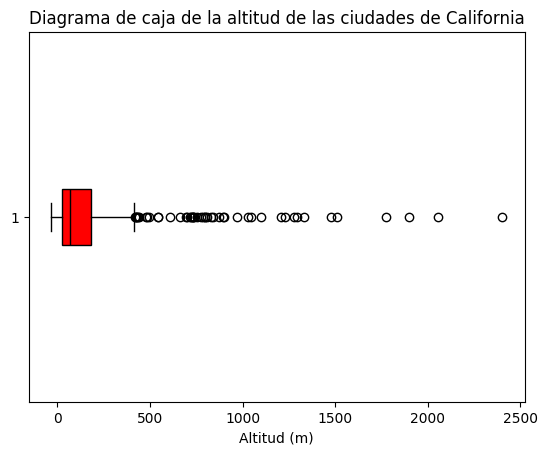

In [97]:
# 4º GRÁFICO -> BOXPLOT
plt.boxplot(df_california["elevation_m"],vert=False, patch_artist=True, boxprops=dict(facecolor='red', color='black'),medianprops=dict(color='black')) # primero los datos, "vert= False" para invertir el resultado. "parch_artist = true" nos permite modificar la caja
plt.title("Diagrama de caja de la altitud de las ciudades de California")
plt.xlabel("Altitud (m)");

### * Para juntar todos los gráficos en uno , ideal es tener todos los gráficos encapsulados en funciones. El siguiente código es el mismo que el anterior PERO con dichas gráficas encapsuladas para que la representación en subplots sea notablemente más facil.

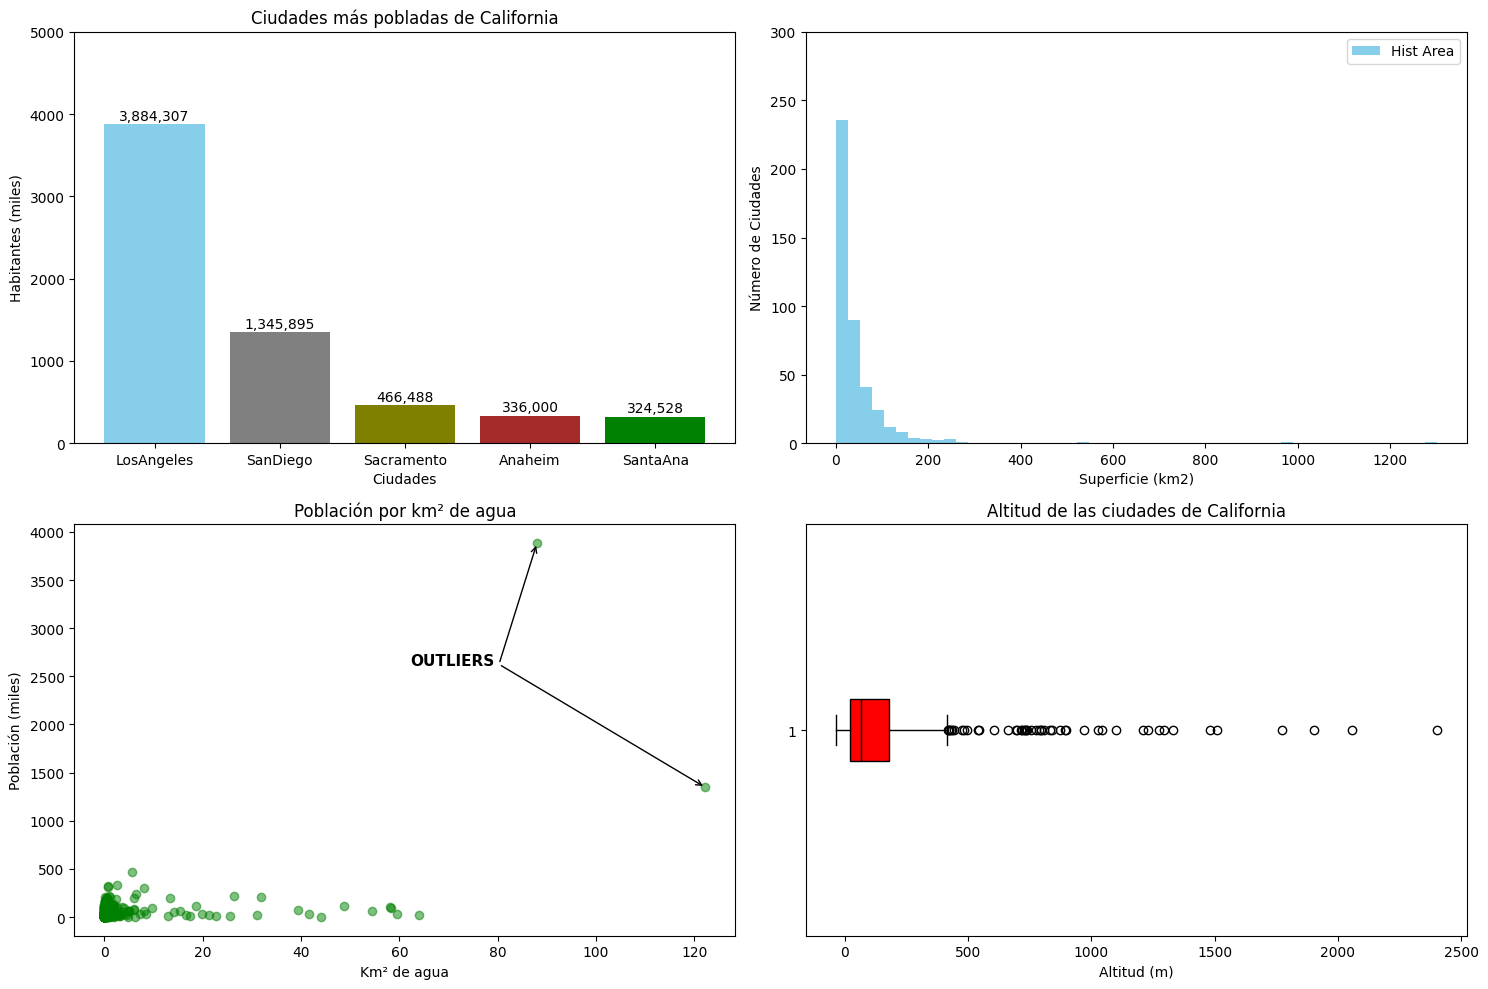

In [115]:

# --- GRÁFICO 1: BARRAS ---
def grafico_barras(ax):
    colores = ['skyblue', 'gray', 'olive', 'brown', "green"]
    ax.bar(top_ciudades_mayor_poblacion["city"],
           height=top_ciudades_mayor_poblacion["population_total"]/1000,
           color=colores)
    ax.set_title("Ciudades más pobladas de California")
    ax.set_ylim(0, 5000)
    ax.set_ylabel("Habitantes (miles)")
    ax.set_xlabel("Ciudades")

    for i, row in top_ciudades_mayor_poblacion.iterrows():
        ciudad = row["city"]
        poblacion_miles = row["population_total"] / 1000
        ax.text(ciudad, poblacion_miles + 50, f"{int(row['population_total']):,}", ha="center")

# --- GRÁFICO 2: HISTOGRAMA ---
def grafico_histograma(ax):
    ax.hist(area_total_ciudades["area_total_km2"], bins=50, color='skyblue', label="Hist Area")
    ax.set_ylim(0, 300)
    ax.set_xlabel("Superficie (km2)")
    ax.set_ylabel("Número de Ciudades")
    ax.legend()

# --- GRÁFICO 3: DISPERSIÓN CON OUTLIERS ---
def grafico_dispersion(ax):
    ax.scatter(area_de_agua_numero_habitantes["area_water_km2"],
               area_de_agua_numero_habitantes["population_total"]/1000,
               color="green", alpha=0.5)
    ax.set_title("Población por km² de agua")
    ax.set_xlabel("Km² de agua")
    ax.set_ylabel("Población (miles)")

    # OUTLIERS
    x1 = area_de_agua_numero_habitantes["area_water_km2"][0]
    y1 = area_de_agua_numero_habitantes["population_total"][0] / 1000
    x2 = area_de_agua_numero_habitantes["area_water_km2"][1]
    y2 = area_de_agua_numero_habitantes["population_total"][1] / 1000

    x_text = x1 - 60
    y_text = (y1 + y2) / 2
    ax.text(x_text, y_text, 'OUTLIERS', fontsize=11, fontweight='bold')

    ax.annotate("", (x1, y1), xytext=(x_text+18,y_text+10),
                arrowprops=dict(arrowstyle="->", facecolor='black'))
    ax.annotate("", (x2, y2), xytext=(x_text+18,y_text+10),
                arrowprops=dict(arrowstyle="->", facecolor='black'))

# --- GRÁFICO 4: BOXPLOT ---
def grafico_boxplot(ax):
    ax.boxplot(df_california["elevation_m"],
               vert=False, patch_artist=True,
               boxprops=dict(facecolor='red', color='black'),
               medianprops=dict(color='black'))
    ax.set_title("Altitud de las ciudades de California")
    ax.set_xlabel("Altitud (m)")

# ===================================
# === UNIMOS TODOS LOS GRÁFICOS =====
# ===================================

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()  # Para usar axs[0], axs[1], ...

grafico_barras(axs[0])
grafico_histograma(axs[1])
grafico_dispersion(axs[2])
grafico_boxplot(axs[3])

plt.tight_layout()
plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [ ]:
fig.savefig("graficos_california.png", dpi=300) # Guardamos la figura en la misma carpeta donde está este archivo.

